In [ ]:
!pip install kaggle

In [ ]:
!mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
api_token = {"username":"jadidjadid","key":"dbe3f05ab061baeb97efda9fa16cb985"}
import json
import zipfile
import os
with open('/root/.kaggle/kaggle.json', 'w') as file:
    json.dump(api_token, file)
!chmod 600 /root/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d andrewmvd/lung-and-colon-cancer-histopathological-images

lung-and-colon-cancer-histopathological-images.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip lung-and-colon-cancer-histopathological-images.zip

Streaming output truncated to the last 5000 lines.
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc1.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc10.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc100.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc1000.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc1001.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc1002.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc1003.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc1004.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc1005.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc1006.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc1007.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc1008.jpeg  
  inflating: lung_c

In [ ]:
colon_aca_dataset = "/content/lung_colon_image_set/colon_image_sets/colon_aca"
os.makedirs('/content/model_cell_images/train/colon_aca') 
os.makedirs('/content/model_cell_images/validation/colon_aca')
os.makedirs('/content/model_cell_images/test/colon_aca')




colon_n_dataset = "/content/lung_colon_image_set/colon_image_sets/colon_n"
os.makedirs('/content/model_cell_images/train/colon_n') 
os.makedirs('/content/model_cell_images/validation/colon_n')
os.makedirs('/content/model_cell_images/test/colon_n')

FileExistsError: ignored

In [ ]:
import os
import shutil

colon_aca_train= "/content/model_cell_images/train/colon_aca"
colon_aca_validation= "/content/model_cell_images/validation/colon_aca"
colon_aca_test= "/content/model_cell_images/test/colon_aca"

filesun1 = os.listdir(colon_aca_dataset)
for file in filesun1[0:int(len(filesun1) * .8)]:
  new_path = shutil.move(f"{colon_aca_dataset}/{file}", colon_aca_train)


filesun2 = os.listdir(colon_aca_dataset)
for file in filesun2[0:int(len(filesun1) * .19)]:
  new_path = shutil.move(f"{colon_aca_dataset}/{file}", colon_aca_validation)

  
filesun3 = os.listdir(colon_aca_dataset)
for file in filesun3:
    new_path = shutil.move(f"{colon_aca_dataset}/{file}", colon_aca_test)  

In [ ]:


colon_n_train= "/content/model_cell_images/train/colon_n"
colon_n_validation= "/content/model_cell_images/validation/colon_n"
colon_n_test= "/content/model_cell_images/test/colon_n"

filespr1 = os.listdir(colon_n_dataset)
for file in filespr1[0:int(len(filespr1) * .8)]:
  new_path = shutil.move(f"{colon_n_dataset}/{file}", colon_n_train)


filespr1 = os.listdir(colon_n_dataset)
for file in filespr1[0:int(len(filespr1) * .19)]:
  new_path = shutil.move(f"{colon_n_dataset}/{file}", colon_n_validation)

  
filespr2 = os.listdir(colon_n_dataset)
for file in filespr2:
    new_path = shutil.move(f"{colon_n_dataset}/{file}", colon_n_test)  

In [ ]:
import os
base_dir = '/content/model_cell_images'

train_dir = os.path.join(base_dir, 'train')
train_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

train_colon_aca_dir = os.path.join(train_dir, 'colon_aca')
train_colon_n_dir = os.path.join(train_dir, 'colon_n')

validation_colon_aca_dir = os.path.join(validation_dir, 'colon_aca')
validation_colon_n_dir = os.path.join(validation_dir, 'colon_n')

test_colon_aca_dir = os.path.join(test_dir, 'colon_aca')
test_colon_n_dir = os.path.join(test_dir, 'colon_n')


In [ ]:
print('total training colon_aca images:', len(os.listdir(train_colon_aca_dir)))
print('total training colon_n images:', len(os.listdir(train_colon_n_dir)))

print('total test colon_aca images:', len(os.listdir(test_colon_aca_dir)))
print('total test colon_n images:', len(os.listdir(test_colon_n_dir)))

print('total test colon_aca images:', len(os.listdir(test_colon_aca_dir)))
print('total test colon_n images:', len(os.listdir(test_colon_n_dir)))

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from sklearn.utils import shuffle

#melakukan rescaling, rotate,zoom, flip horizontal
batch_size = 32
augmen_gen = ImageDataGenerator(rescale=1 / 255,
                                rotation_range=40,
                                width_shift_range=0.2,
                                height_shift_range=0.2,
                                zoom_range=0.2,
                                horizontal_flip=True,
                                fill_mode='nearest')
#melakukan class mode= metode pemilihan clasifikasi, taret size= dimensi citra, batch size= banyak citra yg dimasukkan setiap step, shuffle= acak data tida sesusai alfabetik
train_aug = augmen_gen.flow_from_directory(
    '/content/model_cell_images/train',
    class_mode = 'categorical',
    shuffle=True,
    target_size = (250,250),
    batch_size=batch_size,
    color_mode ='rgb'
)

val_aug = augmen_gen.flow_from_directory(
    '/content/model_cell_images/validation',
    class_mode = 'categorical',
    shuffle=True,
    target_size = (250,250),
    batch_size=batch_size,
    color_mode ='rgb'
)

test_aug = augmen_gen.flow_from_directory(
    '/content/model_cell_images/test',
    class_mode = 'categorical',
    shuffle=False,
    target_size = (250,250),
    batch_size=batch_size,
    color_mode ='rgb',
)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Conv2D, MaxPool2D, AveragePooling2D, GlobalMaxPool2D, GlobalAveragePooling2D, Dropout, Flatten

In [ ]:
model = Sequential()

model.add(InputLayer(input_shape=[250,250,3]))
model.add(Conv2D(filters=16, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2, padding='same'))
model.add(Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2, padding='same'))
model.add(Conv2D(filters=64, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2, padding='same'))
model.add(GlobalMaxPool2D())
model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

print(model.summary())

In [ ]:
from tensorflow.keras.optimizers import Adam

model.compile(optimizer=Adam(lr=0.001), 
              loss='binary_crossentropy', 
              metrics=['acc'])

In [ ]:
H = model.fit(train_aug, steps_per_epoch=2, epochs=100, validation_data=test_aug, validation_steps=2, verbose=2)

In [ ]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import InputLayer, Dense, Conv2D, AveragePool2D, Flatten, BatchNormalization, Dropout

# Feature Extraction Layer
model2 = Sequential()

model2.add(InputLayer(input_shape=[250,250,3]))
model2.add(Conv2D(filters=16, kernel_size=3, strides=1, padding='same', activation='elu'))
model2.add(BatchNormalization())
model2.add(Averageool2D(pool_size=2, padding='same'))
model2.add(Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='elu'))
model2.add(BatchNormalization())
model2.add(Averageool2D(pool_size=2, padding='same'))
model2.add(Conv2D(filters=64, kernel_size=3, strides=1, padding='same', activation='elu'))
model2.add(BatchNormalization())
model2.add(Averageool2D(pool_size=2, padding='same'))
model2.add(Dropout(0.25))
model2.add(Flatten())

In [ ]:
model2.add(Dense(128, activation='elu'))
model2.add(Dropout(0.5))
model2.add(Dense(5, activation='softmax'))

In [ ]:
print(model2.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 250, 250, 16)      448       
_________________________________________________________________
batch_normalization_3 (Batch (None, 250, 250, 16)      64        
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 125, 125, 16)      0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 125, 125, 32)      4640      
_________________________________________________________________
batch_normalization_4 (Batch (None, 125, 125, 32)      128       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 63, 63, 64)       

In [ ]:
model2.compile(optimizer=Adam(lr=0.001), 
              loss='categorical_crossentropy', 
              metrics=['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
H2 = model2.fit(train_aug, steps_per_epoch=2, epochs=100, validation_data=test_aug, validation_steps=2, verbose=2)

Epoch 1/100
19/19 [==============================] - 4s 152ms/step - loss: 0.0533 - acc: 0.9769 - val_loss: 16.2179 - val_acc: 0.0000e+00
Epoch 2/100
19/19 [==============================] - 2s 93ms/step - loss: 0.0000e+00 - acc: 1.0000 - val_loss: 75.0794 - val_acc: 0.0000e+00
Epoch 3/100
19/19 [==============================] - 2s 94ms/step - loss: 0.0000e+00 - acc: 1.0000 - val_loss: 123.0920 - val_acc: 0.0000e+00
Epoch 4/100
19/19 [==============================] - 2s 93ms/step - loss: 0.0000e+00 - acc: 1.0000 - val_loss: 159.2809 - val_acc: 0.0000e+00
Epoch 5/100
19/19 [==============================] - 2s 92ms/step - loss: 0.0000e+00 - acc: 1.0000 - val_loss: 185.1931 - val_acc: 0.0000e+00
Epoch 6/100
19/19 [==============================] - 2s 93ms/step - loss: 0.0000e+00 - acc: 1.0000 - val_loss: 201.1386 - val_acc: 0.0000e+00
Epoch 7/100
19/19 [==============================] - 2s 92ms/step - loss: 0.0000e+00 - acc: 1.0000 - val_loss: 207.6913 - val_acc: 0.0000e+00
Epoch 8/100

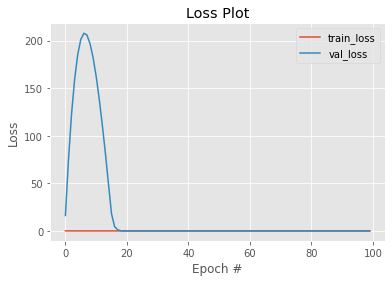

In [ ]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 100), H2.history["loss"], label="train_loss")
plt.plot(np.arange(0, 100), H2.history["val_loss"], label="val_loss")
plt.title("Loss Plot")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [ ]:
pred2 = model2.predict(x_val)
labels2 = (pred2 > 0.5).astype(np.int)

print(classification_report(y_val, labels2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



In [ ]:
model.save('drive/MyDrive/MLModule/BatchNormModel.h5')
model2.save('drive/MyDrive/MLModule/DropoutModel.h5')

Model : BatchNormModel.h5
Predicted Label : cat
Probability : 0.0

Model : DropoutModel.h5
Predicted Label : cat
Probability : 0.0



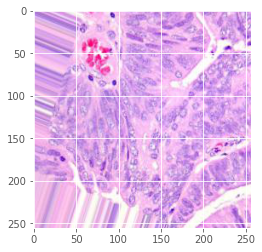

In [ ]:
from PIL import Image

img_upload = Image.open("/content/model_aug/train/_1005_7273957.jpeg")
img_plt = plt.imshow(img_upload)
img = np.array(img_upload)
img = cv2.cvtColor(np.array(img), cv2.COLOR_BGR2RGB)

model_list = ['drive/MyDrive/MLModule/BatchNormModel.h5','drive/MyDrive/MLModule/DropoutModel.h5']
labels = ['cat', 'dog']

for m in model_list:
    model = load_model(m)
    size_img = model.layers[0].output_shape[1:3]
    imgs = cv2.resize(img, size_img)
    imgs = imgs.astype('float32') / 255
    pred = model.predict(np.expand_dims(imgs, axis=0))[0]
    print('Model :', m.split('/')[-1])
    print('Predicted Label :',labels[((pred > 0.5)+0).ravel()[0]])
    print('Probability :',[ round(elem, 4) for elem in pred ][0])
    print('===============\n')